# Artificial intelligence

Opdracht: <b>Neural networks</b>

Groep: 
- Xin Wang
- Jascha van der Ark

## Opdracht 1.1: Binary classification

### Intro
Dit gedeelte van de opdracht bevat de uitwerking van een binair classificatie van de MNIST Dataset

#### Dataset setup.

In [7]:
# Import all the necessary tooling
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import roc_curve, auc

import pandas as pd
import numpy as np
import seaborn as sns 
# Matplotlib
import matplotlib.pyplot as plt

We will start with a binary classification of the dataset. With the goal of determining if a digit is a 1 or not.

In [8]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

# Create the labels
number_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x_train = x_train / 255.0
x_test = x_test / 255.0

# If needed, pre-process the data.
# Convert labels to binary: 1 if the digit is '1', otherwise 0
y_train_binary = (y_train == 1).astype(int)
y_test_binary = (y_test == 1).astype(int)

# y_train_binary = y_train
# y_test_binary = y_test

# Set up the model
# Like the amounts of layers needed
# The kinds of preceptors or neurons needed
# Eventually append the prediction layer to it.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False
)])



c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 772us/step - auc_1: 0.9668 - loss: 0.1241 - val_auc_1: 0.9991 - val_loss: 0.0235
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - auc_1: 0.9972 - loss: 0.0268 - val_auc_1: 0.9985 - val_loss: 0.0196
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - auc_1: 0.9979 - loss: 0.0234 - val_auc_1: 0.9986 - val_loss: 0.0188
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - auc_1: 0.9977 - loss: 0.0222 - val_auc_1: 0.9986 - val_loss: 0.0191
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - auc_1: 0.9980 - loss: 0.0199 - val_auc_1: 0.9986 - val_loss: 0.0181
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - auc_1: 0.9979 - loss: 0.0187 - val_auc_1: 0.9985 - val_loss: 0.0188
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - auc_1: 0.9986 - loss: 0.0186 - val_auc_1: 0.9986 - val_loss: 0.0183
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - auc_1: 0.9986 - loss: 0.0167 - val_auc_1: 0.9985 - val_loss:

### Evaluate and predict:

In [9]:
# Evaluate
# Use the model for prediction
model.fit(x_train, y_train_binary, epochs=10, validation_split=0.1)

# Parameters: epochs 10,  optimizer= adam en loss is binary crossentropy = Result: 11 procent nauwkeurig
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_binary, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

313/313 - 0s - 540us/step - auc_1: 0.9978 - loss: 0.0156
Loss =  0.01562434807419777
Accuracy =  0.9977768659591675


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
<class 'numpy.ndarray'>


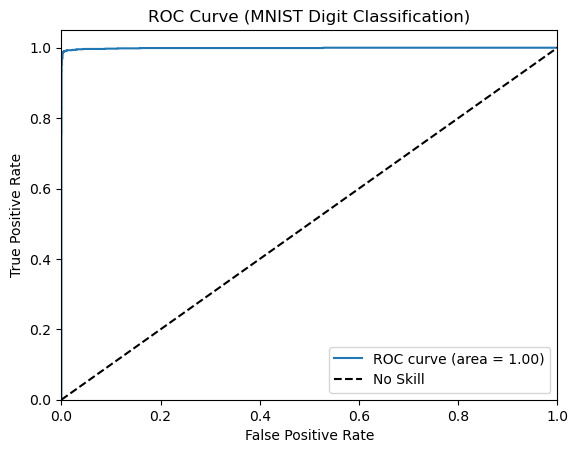

In [12]:
y_pred_proba = model.predict(x_test)

print(type(y_test_binary))

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (MNIST Digit Classification)')
plt.legend(loc="lower right")
plt.show()

In [4]:
# Create a visualisation
# Function to plot images with their predicted probabilities
def plot_predictions(images, labels, predictions, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images//2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}\nPred: {predictions[i]:.4f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_bar_predictions(images, labels, predictions):
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.5
    bar_positions = np.arange(len(images))
    
    bars = ax.bar(bar_positions, predictions, bar_width, align='center')

    # Add actual labels on top of the bars
    for bar, label, prob in zip(bars, labels, predictions):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{label}\n{prob:.2f}', 
                ha='center', va='bottom', fontsize=10)

    ax.set_xlabel('Image Index')
    ax.set_ylabel('Predicted Probability of Being "1"')
    ax.set_title('Predicted Probabilities of Being "1" for Selected Images')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f'Img {i+1}' for i in range(len(images))], rotation=45)

    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


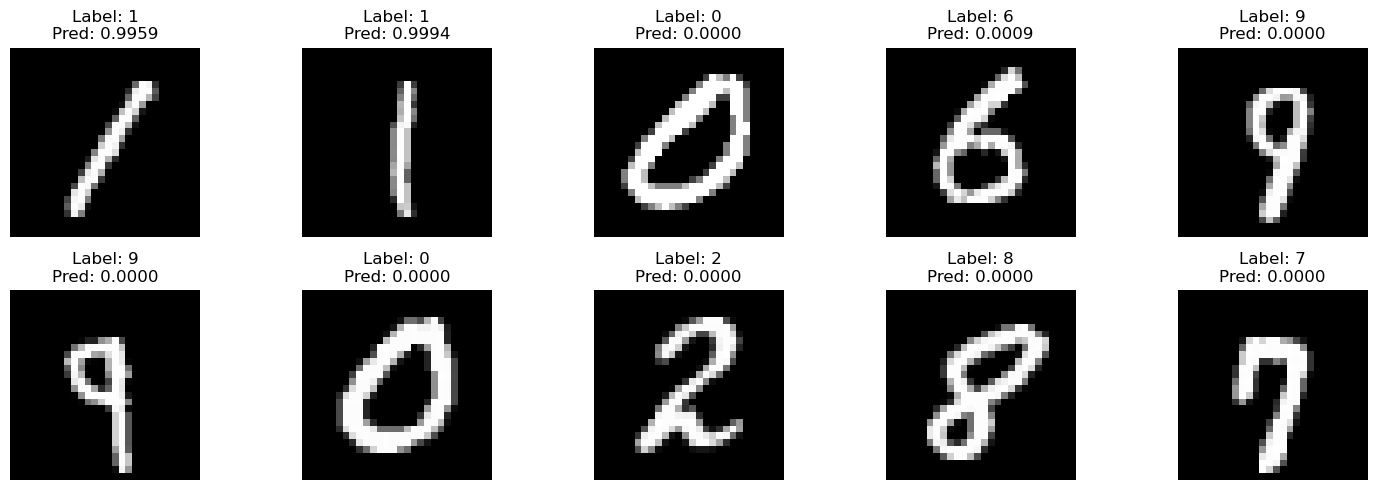

Total number of 1's in dataset  1135
Total number of 0's in dataset  8865
Total number of 1 predictions  1133
Total number of 0 predictions  8867
Total number of false 1 predictions  20
Total number of false 0 predictions  22
Chance of false 1 prediction 1.7652250661959399 %
Chance of false 0 prediction 0.24811097327168152 %


In [5]:
predictions = model.predict(x_test)
predictions_formatted = predictions

def filter_only_ones(input_list):
    return [x for x in input_list if x == 1]

for i in range(len(predictions)): 
    if predictions[i] >= 0.5: 
        predictions_formatted[i] = 1
    else: predictions_formatted[i] = 0


    
countOf1 = len(filter_only_ones(y_test))
countOf0 = len(y_test) - countOf1

countOfPredicted1 = len(filter_only_ones(predictions_formatted))
countOfPredicted0 = len(predictions_formatted) - countOfPredicted1

countOfFalse1 = 0
countOfFalse0 = 0

for i in range(len(predictions)): 
    if predictions_formatted[i] != y_test_binary[i] : 
        if predictions_formatted[i] == 1 : 
            countOfFalse1 += 1
        else: 
            countOfFalse0 += 1


# Select a few test images to visualize
num_images_to_visualize = 10
indices = np.random.choice(len(x_test), num_images_to_visualize, replace=False)
selected_images = x_test[indices]
selected_labels = y_test[indices]

# Preprocess the images: no need to reshape, model accepts (num_samples, 28, 28)
selected_images_preprocessed = selected_images

# Use the model to predict the probabilities
predictions = model.predict(selected_images_preprocessed).flatten()

# Plot the images with their predicted probabilities
plot_predictions(selected_images, selected_labels, predictions, num_images=num_images_to_visualize)

print("Total number of 1's in dataset ", countOf1)
print("Total number of 0's in dataset ", countOf0)
print("Total number of 1 predictions ", countOfPredicted1)
print("Total number of 0 predictions ", countOfPredicted0)
print("Total number of false 1 predictions ", countOfFalse1)
print("Total number of false 0 predictions ", countOfFalse0)
print("Chance of false 1 prediction", (countOfFalse1 / countOfPredicted1 * 100), "%")
print("Chance of false 0 prediction", (countOfFalse0 / countOfPredicted0 * 100), "%")


## Deel 2: Eigen dataset
To see the methodology of the second part of the assignment, follow this file below or go to file part2.ipynb